## University of California, Berkeley
## Chem 274B: Software Engineering Fundamentals for Molecular Sciences Final Project
### Creators:  Francine Bianca Oca, Kassady Marasigan and Korede Ogundele
### Date Created: December 5, 2023

This file contains functions and plots that pertain to our allele frequency model.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# Output 1: Display an image of the current CA configuration

In [40]:
import matplotlib.pyplot as plt

def display_ca_image(states, cell_size, time_step, color_map):
  """
  Displays an image of a cellular automata state at a specific time step.

  Args:
    states: A list of lists representing the cellular automata state, where each element is the state of a cell (integer).
    cell_size: The size of each cell in the image (pixels).
    time_step: The time step of the state to display.
    color_map: A dictionary mapping cell states to RGB color values.

  Returns:
    None (displays the image directly).
  """

  # Check if color map is provided
  if not color_map:
    raise ValueError("Missing color map for cell states.")

  # Convert cell states to color values
  colors = [color_map[state] for state in states]

  # Create image data from colors
  image_data = np.array(colors).reshape((len(states), len(states[0]), 3))

  # Set figure size based on cell size
  plt.figure(figsize=(len(states) * cell_size / 100, len(states[0]) * cell_size / 100))

  # Display the image with no axes and no title
  plt.imshow(image_data, interpolation="nearest", aspect="auto", cmap="cividis")
  plt.axis('off')
  plt.title(f"Time Step: {time_step}")
  plt.show()

# Example usage
states = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]  # Dummy cell states data
cell_size = 10  # Pixel size for each cell
time_step = 5  # Time step to display
color_map = {1: "red", 0: "green", 2: "blue"}  # Mapping states to colors

display_ca_image(states, cell_size, time_step, color_map)


TypeError: unhashable type: 'list'

In [52]:
def display_cellular_automaton(generation_number, cmap= 'viridis'):
    """
    Display an image of the population at a certain generation

    Parameters
    ----------
    cmap (optional) : str
        colormap to use (default is 'viridis')

    Returns
    -------
    None (displays the image)
    """
    # Open text file containing generation counts
    with open('Data/simulation_output.txt', 'r') as file:
        output_lines = file.readlines()

    # Find index of the line that starts with 'Generation {generation_number}:'
    start_index = None
    for i, line in enumerate(output_lines):
        if line.startswith(f'Generation {generation_number}:'):
            start_index = i + 1  # skip the line with the generation name
            break

    # If the generation is not found, print an error message
    if start_index is None:
        print(f'ERROR: Generation {generation_number} does not exist') 

    # Extract lines for desired generation
    generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

    # Flatten the generation lines into a single string and split by space
    grid = ' '.join(generation_lines).split()

    # Create a custom colormap with distinct colors for each state
    unique_states = np.unique(grid)
    colors = plt.cm.get_cmap(cmap, len(unique_states))

    # Create a dictionary to map state values to colors
    state_colors = {state: colors(i) for i, state in enumerate(unique_states)}

    # Create an array of colors based on the grid values
    color_array = np.vectorize(state_colors.get)(grid)

    # Display the image using plt.imshow
    plt.imshow(color_array, interpolation='nearest', cmap=cmap, origin='upper')

    # Display colorbar with state labels
    cbar = plt.colorbar(ticks= unique_states, boundaries= np.arange(len(unique_states) + 1) - 0.5)
    cbar.set_ticklabels(unique_states)
    cbar.set_label('Cell States')

    # Show the plot
    plt.show()

In [53]:
display_cellular_automaton(generation_number= 1)

/var/folders/m8/skfw9g2x4_g4pq5cv80_g24w0000gn/T/ipykernel_3448/4267324112.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

<Figure size 640x480 with 2 Axes>

# Output 2: Count the number of individuals in the population that are a particular genotype.

In [47]:
def display_genotype_count(genotype, generation_number):
    """
    Displays the number of individuals in a given genotype at a specific generation.

    Parameters
    ----------
    genotype : str
        the genotype to count individuals for (homozygous dominant, heterozygous, or recessive)
    generation_number : int
        the generation number in the simulation.

    Returns
    -------
    A print statement saying the number of individuals of the chosen genotype in the chosen generation.
    """
    # Open text file containing generation counts
    with open('Data/simulation_output.txt', 'r') as file:
        output_lines = file.readlines()

    # Find index of the line that starts with 'Generation {generation_number}:'
    start_index = None
    for i, line in enumerate(output_lines):
        if line.startswith(f'Generation {generation_number}:'):
            start_index = i + 1  # skip the line with the generation name
            break

    # If the generation is not found, print an error message
    if start_index is None:
        print(f'ERROR: Generation {generation_number} does not exist') 

    # Extract lines for desired generation
    generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines
    print(f'gen lines{generation_lines}')

    # Flatten the generation lines into a single string and split by space
    generation_data = ' '.join(generation_lines).split()
    print(f'gen data {generation_data}')

    # Count the occurrences of each integer, write into a dictionary (counts)
    counts = {}
    for value in generation_data:
        counts[int(value)] = counts.get(int(value), 0) + 1

    # Get counts as a percentage of total population
    if genotype == 'homozygous dominant':
        print(f'There are {counts[1]} individuals with the {genotype} genotype in Generation {generation_number}.')
    if genotype == 'heterozygous':
        print(f'There are {counts[2]} individuals with the {genotype} genotype in Generation {generation_number}.')
    if genotype == 'recessive':
        print(f'There are {counts[3]} individuals with the {genotype} genotype in Generation {generation_number}.')

In [48]:
display_genotype_count(genotype = "recessive", generation_number= 5)

gen lines['3 3 2 3 2 3 2 3 2 2 \n', '3 2 3 2 3 2 2 3 3 2 \n', '3 3 2 3 2 2 2 2 2 2 \n', '2 2 3 2 2 1 3 2 2 2 \n', '3 2 2 3 2 2 2 2 3 2 \n', '3 2 2 2 2 3 2 3 2 2 \n', '2 2 3 2 2 2 3 2 2 2 \n', '2 3 2 2 2 2 2 3 3 2 \n', '2 2 2 2 2 2 2 2 2 3 \n', '2 2 3 2 2 2 2 2 2 3 \n']
gen data ['3', '3', '2', '3', '2', '3', '2', '3', '2', '2', '3', '2', '3', '2', '3', '2', '2', '3', '3', '2', '3', '3', '2', '3', '2', '2', '2', '2', '2', '2', '2', '2', '3', '2', '2', '1', '3', '2', '2', '2', '3', '2', '2', '3', '2', '2', '2', '2', '3', '2', '3', '2', '2', '2', '2', '3', '2', '3', '2', '2', '2', '2', '3', '2', '2', '2', '3', '2', '2', '2', '2', '3', '2', '2', '2', '2', '2', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '2', '2', '3', '2', '2', '2', '2', '2', '2', '3']
There are 29 individuals with the recessive genotype in Generation 5.


# Output 3: Bar graph that displays allele frequency of a chosen generation

In [31]:
def plot_generation_counts(generation_number, total_population):
    """
    This function plots the number of each individuals that have a certain genotype as a bar graph

    Parameters
    ----------
    generation_number : int
        The generation number whose allele frequencies we would like to look at
    total_population : int
        The total number of individuals in the population

    Returns
    -------
    A bar graph with proportions of each allele frequency.

    """
    # Open text file containing generation counts
    with open('Data/simulation_output.txt', 'r') as file:
        output_lines = file.readlines()

    # Find index of the line that starts with 'Generation {generation_number}:'
    start_index = None
    for i, line in enumerate(output_lines):
        if line.startswith(f'Generation {generation_number}:'):
            start_index = i + 1  # skip the line with the generation name
            break

    # If the generation is not found, print an error message
    if start_index is None:
        print(f'ERROR: Generation {generation_number} does not exist') 

    # Extract lines for desired generation
    generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

    # Flatten the generation lines into a single string and split by space
    generation_data = ' '.join(generation_lines).split()

    # Count the occurrences of each integer, write into a dictionary (counts)
    counts = {}
    for value in generation_data:
        counts[int(value)] = counts.get(int(value), 0) + 1

    # Get counts as a percentage of total population
    GG_proportion = counts[1] / total_population
    Gg_proportion = counts[2] / total_population
    gg_propotion = counts[3] / total_population

    # Plot
    labels = ['Homozygous Dominant', 'Heterozygous', 'Recessive']
    proportions = [GG_proportion, Gg_proportion, gg_propotion]

    plt.bar(labels, proportions, color=['royalblue', 'mediumslateblue', 'mediumorchid'])
    plt.title(f'Allele Percentages for Generation {generation_number}')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Population')
    plt.show()


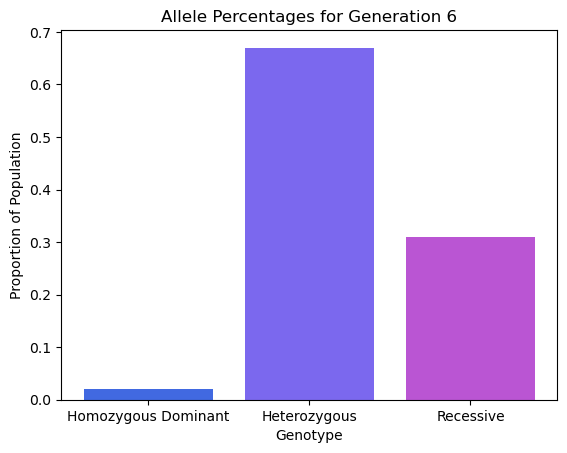

In [34]:
plot_generation_counts(generation_number= 6, total_population= 100)

# Output 4: Filled area plot to visualize how allele frequency changes over generations

In [35]:
def extract_generation_counts_to_df(filename, generation_number):
    """
    This function extracts number of each individuals of each phenotype from the generation count output text and puts the data into a dataframe. The resulting dataframe can be used to produce plots.

    Parameters
    ----------
    filename : str
    Name of file you'd like to extract counts from (include file extension)
    
    Returns
    -------
    df : Pandas dataframe
    A pandas dataframe with generation counts. It's much easier to make graphs with seaborn and plotly once you have a dataframe.
    """
    # Open text file containing generation counts
    with open(filename, 'r') as file:
        output_lines = file.readlines()

    # Initialize a dictionary to store counts for each generation
    all_counts = {}

    # Iterate through each generation
    for generation_number in range(1, generation_number+1):
        # Find index of the line that starts with 'Generation {generation_number}:'
        start_index = None
        for i, line in enumerate(output_lines):
            if line.startswith(f'Generation {generation_number}:'):
                start_index = i + 1  # skip the line with the generation name
                break
        
        # If the generation is not found, print an error message
        if start_index is None:
            print(f'ERROR: Generation {generation_number} does not exist') 
            continue

        # Extract lines for the desired generation
        generation_lines = output_lines[start_index:start_index + 10]  # each generation has 10 lines

        # Flatten the generation lines into a single string and split by space
        generation_data = ' '.join(generation_lines).split()

        # Count the occurrences of each integer, write into a dictionary (counts)
        counts = {}
        for value in generation_data:
            counts[int(value)] = counts.get(int(value), 0) + 1

        # Save counts for the current generation in the all_counts dictionary
        all_counts[generation_number] = counts

    # Create a dataframe from the dictionary
    df = pd.DataFrame(all_counts)

    # Transpose so that rows (genotypes) become columns
    df = df.T

    # Set NaN values to 0
    df =  df.fillna(0)

    # Add column with generation number
    df['Generation Number'] = list(range(0, 50))

    return df
    

In [33]:
# create dataframe to use for area plot
plotting_df = extract_generation_counts_to_df(filename= 'Data/simulation_output.txt', generation_number= 50)

# rename columns
# this line did not work for some reason so I manually created new colums and dropped the old ones
#plotting_df = plotting_df.rename(columns = {'2': 'Heterozygous', '1': 'Homozygous Dominant', '3': 'Recessive', 'Generation': 'Generation'})

plotting_df['Homozygous Dominant Counts'] = plotting_df[1]
plotting_df['Heterozygous Counts'] = plotting_df[2]
plotting_df['Recessive Counts'] = plotting_df[3]

drop_col = [2, 3, 1]
plotting_df = plotting_df.drop(columns= drop_col)

In [36]:
fig = px.area(plotting_df, x='Generation Number', y=['Homozygous Dominant Counts','Heterozygous Counts', 'Recessive Counts'])
fig.show()